In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load the Data
df = pd.read_csv('Telco-Customer-Churn.csv')

# Display first few rows
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
# Step 3: Preprocess the Data


# Drop customerID
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges']= df['TotalCharges'].fillna(df['TotalCharges'].median())

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Check data
print(df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

In [4]:
# Step 4: Split Features and Target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Step 5: Train the Decision Tree Classifier
# Initialize and train the model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [6]:
# Step 6: Make Predictions and Evaluate
y_pred = dt_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# F1 Score
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("F1 Score:", f1)

Accuracy: 0.794180269694819
Confusion Matrix:
 [[881 155]
 [135 238]]
F1 Score: 0.6214099216710183


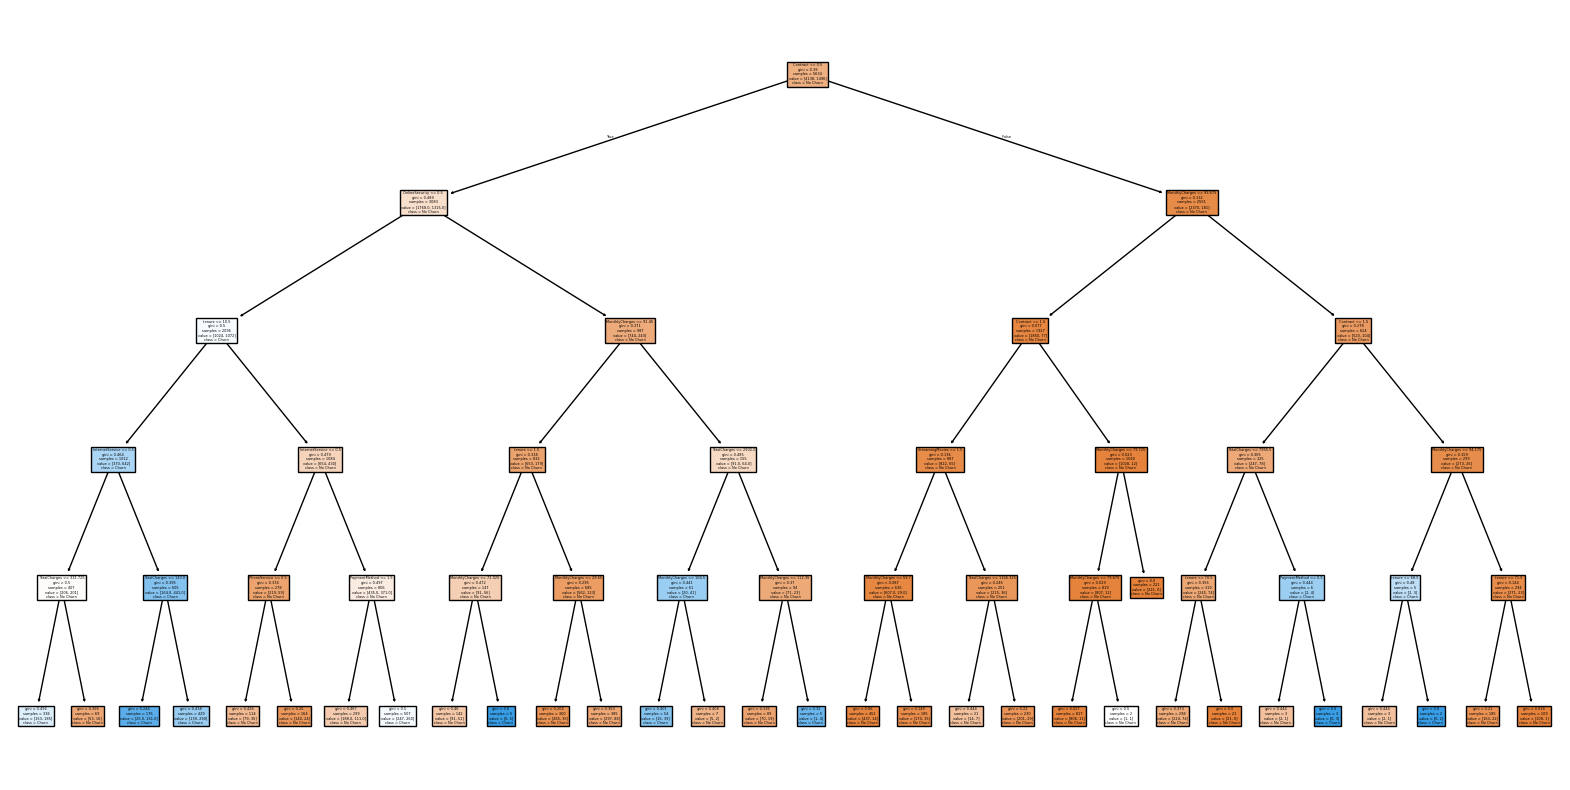

In [ ]:
# Step 7: Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True)
plt.show()